In [1]:
import jupyter_black

jupyter_black.load()

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

from q_learning import QLearning

In [3]:
env = gym.make("CartPole-v1")

agent = QLearning(
    env=env,
    learning_rate=0.1,
    discount_factor=0.99,
    epsilon=1.0,
    epsilon_decay=0.995,
    epsilon_min=0.01,
    n_bins=10,
    seed=42,
)

rewards, episode_lengths = agent.train(n_episodes=5_000)

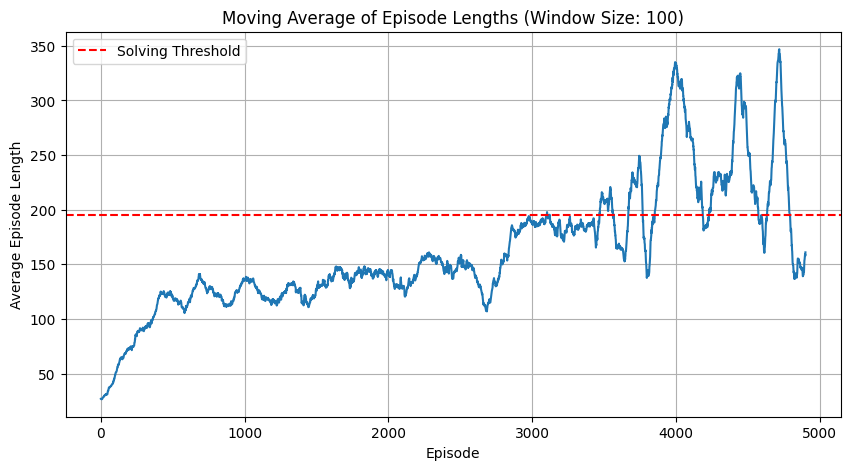

In [6]:
window_size = 100
moving_avg_lengths = np.convolve(
    episode_lengths, np.ones(window_size) / window_size, mode="valid"
)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(moving_avg_lengths)
plt.title(f"Moving Average of Episode Lengths (Window Size: {window_size})")
plt.xlabel("Episode")
plt.ylabel("Average Episode Length")
plt.axhline(y=195, color="r", linestyle="--", label="Solving Threshold")
plt.legend()
plt.grid(True)
plt.show()